In [275]:
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [308]:
raw['channel'].value_counts().tail(2)

Dhinasari samayal        48
Des boussoles et nous    38
Name: channel, dtype: int64

In [310]:
temp = raw['channel'].value_counts().tail(2).index.tolist()
to_debug = raw[raw['channel'].isin(temp)].reset_index(drop=True)

,channel,sign_in,date,title,genre,duration,video_n_view,description,n_comment,n_like,n_dislike,daily_n_view,cumul_view,cumul_subs,current_cumul_view,current_n_video,current_cumul_subs
10424,Dhinasari samayal,2019-9-12,2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,13638,0,57713,200,1600
10425,Dhinasari samayal,2019-9-12,2020-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,13676,0,57713,200,1600
10426,Dhinasari samayal,2019-9-12,2020-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,13714,0,57713,200,1600
10427,Dhinasari samayal,2019-9-12,2020-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,13752,0,57713,200,1600
10428,Dhinasari samayal,2019-9-12,2020-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,13790,0,57713,200,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11199,Des boussoles et nous,2019-7-8,2020-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1188,248113,5310,255286,61,5420
11200,Des boussoles et nous,2019-7-8,2020-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,828,248941,5320,255286,61,5420
11201,Des boussoles et nous,2019-7-8,2020-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1038,249979,5330,255286,61,5420
11202,Des boussoles et nous,2019-7-8,2020-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442,250421,5350,255286,61,5420


In [301]:
raw = pd.read_csv('../../data/train_raw_LITE.csv')

# enc = LabelEncoder()
# raw['channel'] = enc.fit_transform(raw['channel'])
# raw.loc[raw['genre'].notnull(), 'genre'] = enc.fit_transform(raw.loc[raw['genre'].notnull(), 'genre'])
# raw = _get_is_upload(raw)
# raw = raw.groupby('channel').apply(lambda x: _get_no_upload_interval(x)).reset_index(drop=True)
# raw = raw[~raw['channel'].isin([25, 43])].reset_index(drop=True)
# channels = raw['channel'].unique().tolist()


# today = pd.to_datetime('2020-12-03')
# working_days = dict()
# for i in channels:
#     temp = raw[raw['channel']==i].reset_index(drop=True)
#     try:
#         working_days[i] = (today - pd.to_datetime(temp[temp['title'].notnull()]['date'].iloc[0])).days
#     except:
#         working_days[i] = 0
        
# cumul_video = dict()
# for i in channels:
#     temp = raw[raw['channel']==i].reset_index(drop=True)
#     cumul_video[i] = temp['current_n_video'].iloc[0]

# # drop = ['description', 'title', 'date', 'sign_in', 'genre', ]
# # raw.drop(drop, axis=1, inplace=True)
# # raw.loc[raw['n_comment'] == '댓글 사용 중지', 'n_comment'] = 0
# # raw.fillna(0, inplace=True)

# raw.head()

<AxesSubplot:>

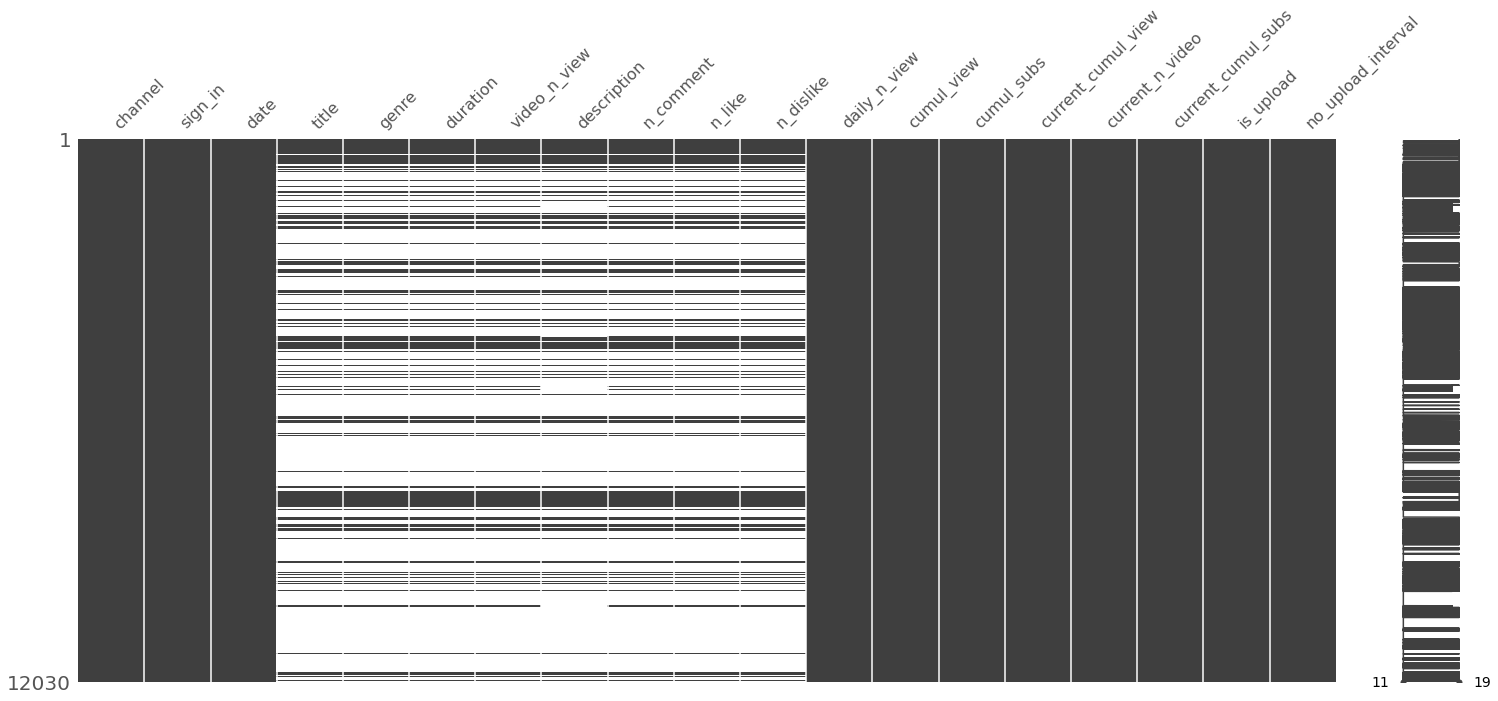

In [277]:
msno.matrix(raw)

In [278]:
imps = ['title', 'genre', 'duration', 'video_n_view', 'description', 'n_comment', 'n_like', 'n_dislike']

In [283]:
for feature in imps:
    raw.loc[raw[feature].notnull(), feature] = 1
    raw.loc[raw[feature].isnull(), feature] = 0
drop = ['description', 'title', 'date', 'sign_in', 'genre', ]
raw.drop(drop, axis=1, inplace=True)
raw.loc[raw['n_comment'] == '댓글 사용 중지', 'n_comment'] = 0
raw.fillna(0, inplace=True)

In [250]:
avg_video = dict()
for i in channels:
    avg_video[i] = cumul_video[i] / (working_days[i] + 0.01)
    
daily_upload = pd.Series(avg_video)

In [298]:
0~0.2 <- 채널마다 '비교'가 가능한 통계량? => N1 개 랜덤샘플링
0.2~0.4 => N2 개 랜덤샘플링
0~0.2 => N3 개 랜덤샘플링
0~0.2 => N4 개 랜덤샘플링
...
..



SyntaxError: invalid syntax (<ipython-input-298-629543ded7b1>, line 1)

<AxesSubplot:>

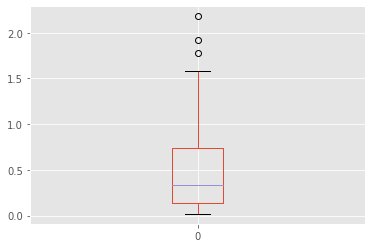

In [299]:
pd.DataFrame(daily_upload).boxplot()

In [288]:
channel_id = raw['channel']
scaler = MinMaxScaler()

data = raw.copy()
data.iloc[:, 1:] = scaler.fit_transform(raw.drop('channel', axis=1))

data.head()

,channel,duration,video_n_view,n_comment,n_like,n_dislike,daily_n_view,cumul_view,cumul_subs,current_cumul_view,current_n_video,current_cumul_subs,is_upload,no_upload_interval
0,0,1.0,1.0,1.0,1.0,1.0,0.450389,0.006547,0.018673,1.0,1.0,1.0,1.0,0.0
1,0,1.0,1.0,1.0,1.0,1.0,0.452086,0.006897,0.018673,1.0,1.0,1.0,1.0,0.0
2,0,1.0,1.0,1.0,1.0,1.0,0.452086,0.006897,0.018673,1.0,1.0,1.0,1.0,0.0
3,0,1.0,1.0,1.0,1.0,1.0,0.452086,0.006897,0.018673,1.0,1.0,1.0,1.0,0.0
4,0,1.0,1.0,1.0,1.0,1.0,0.451372,0.007143,0.019292,1.0,1.0,1.0,1.0,0.0


In [292]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
result_raw = pca.fit_transform(data.drop('channel', axis=1).values)
result = pd.DataFrame(data=result_raw, columns = ['comp1', 'comp2'])
result['channel'] = channel_id
# 주성분으로 이루어진 데이터 프레임 구성
pca.explained_variance_

array([1.22382203, 0.11565195])

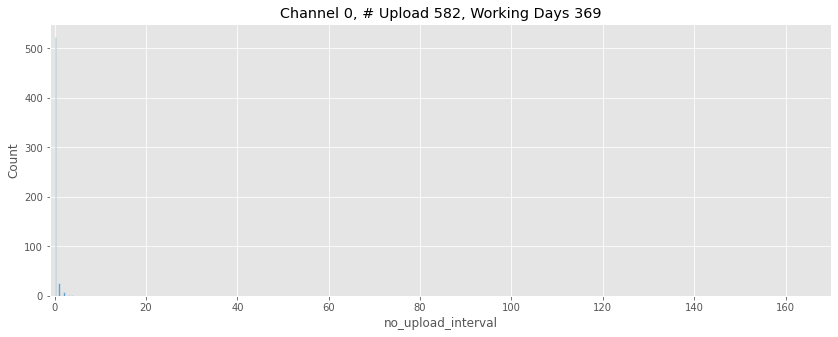

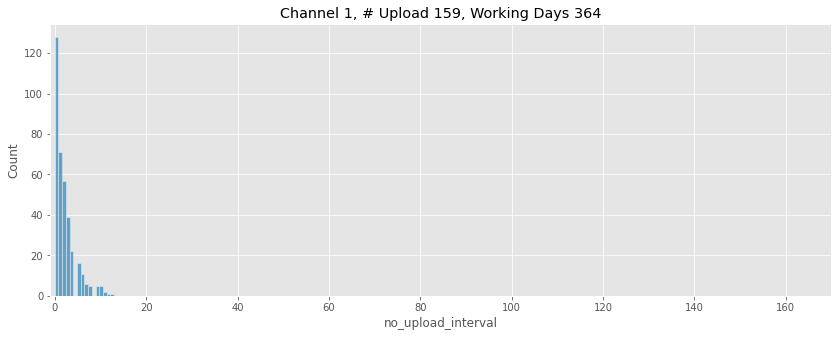

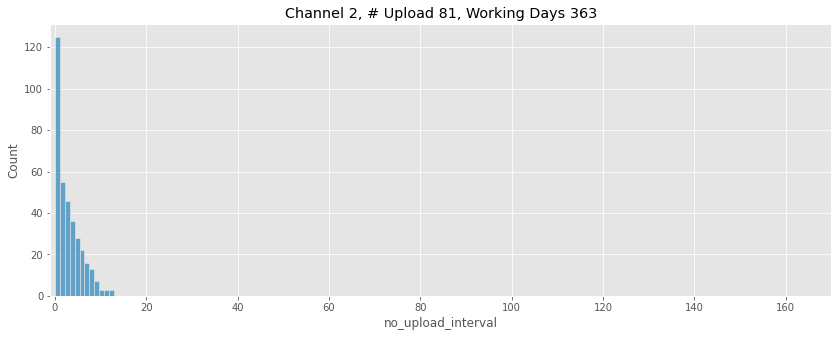

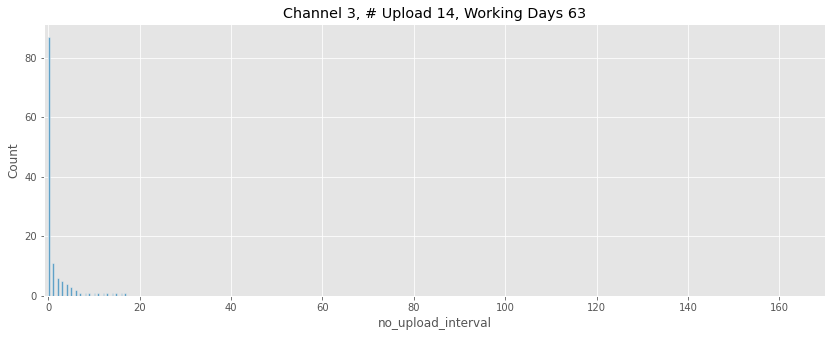

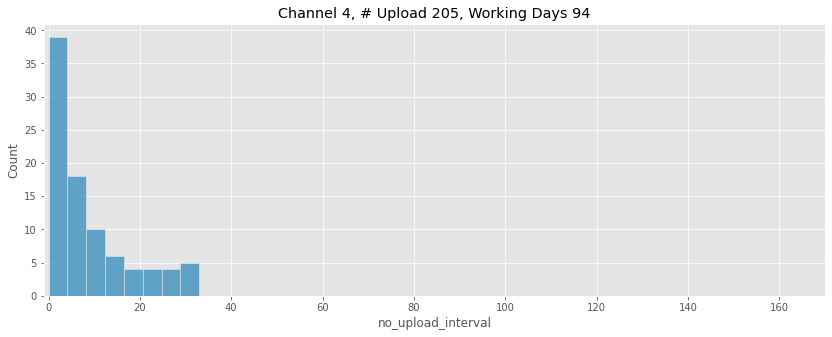

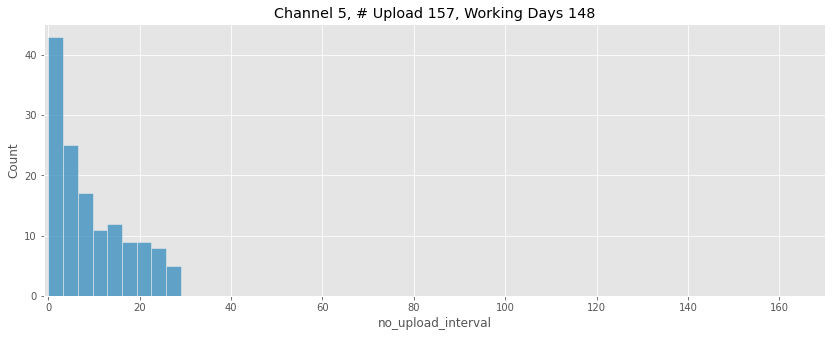

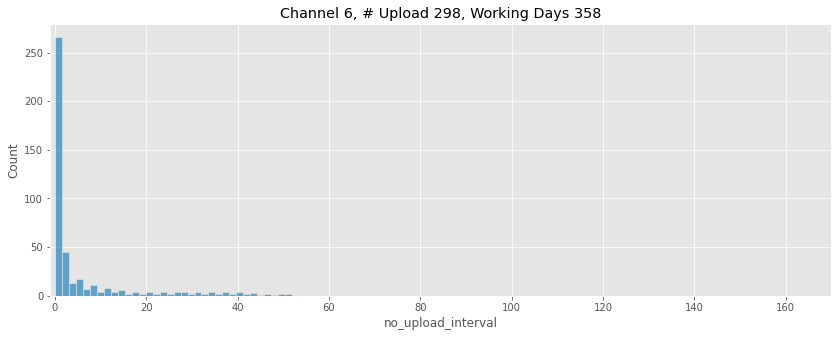

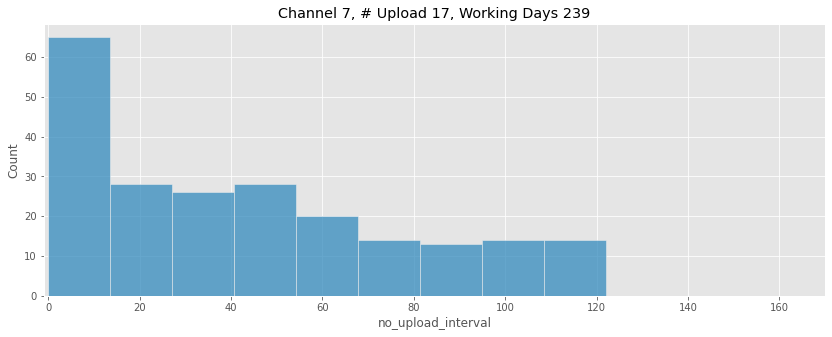

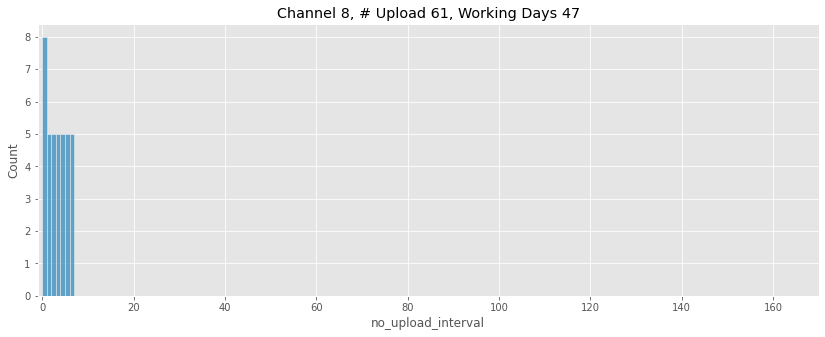

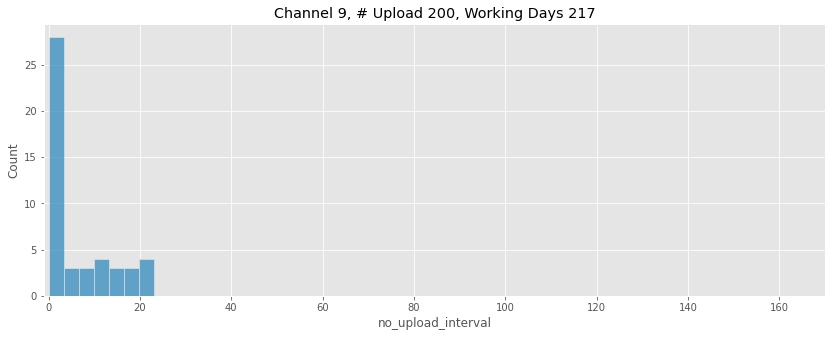

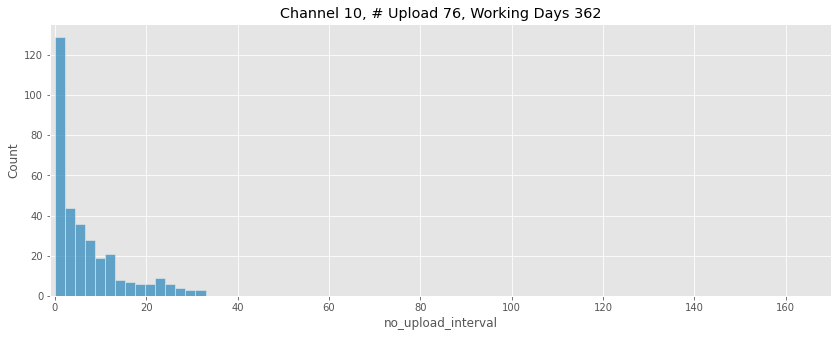

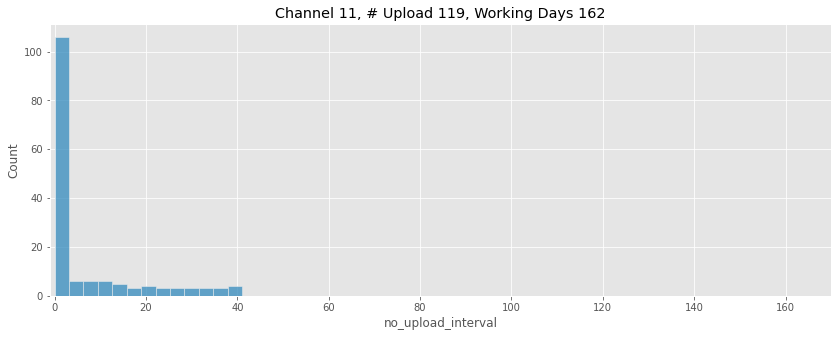

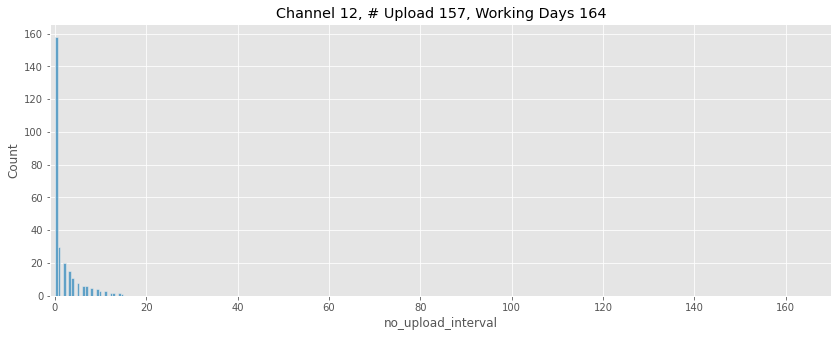

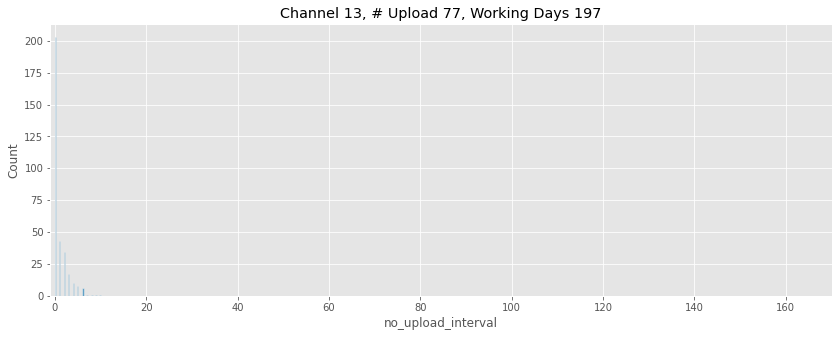

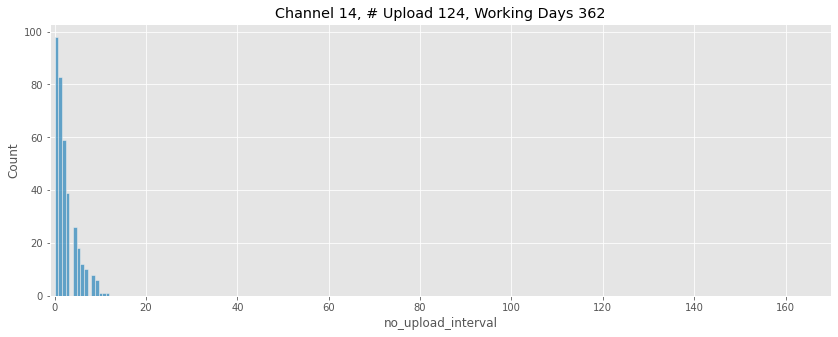

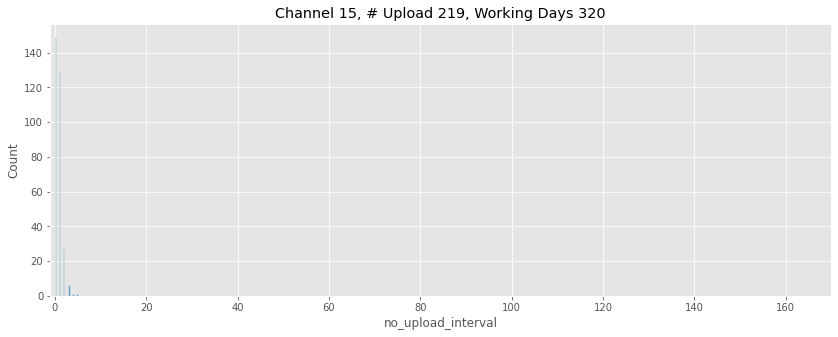

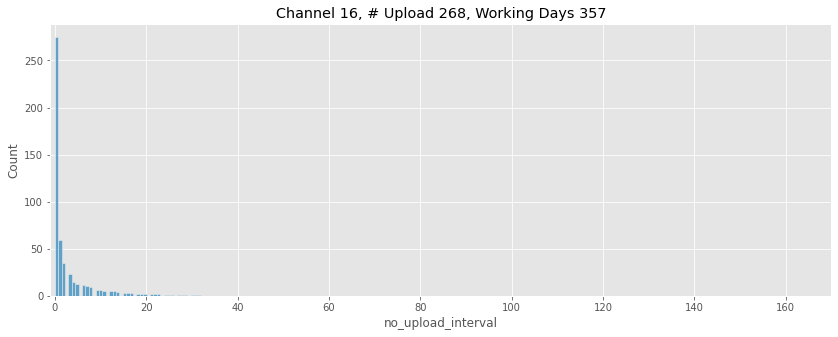

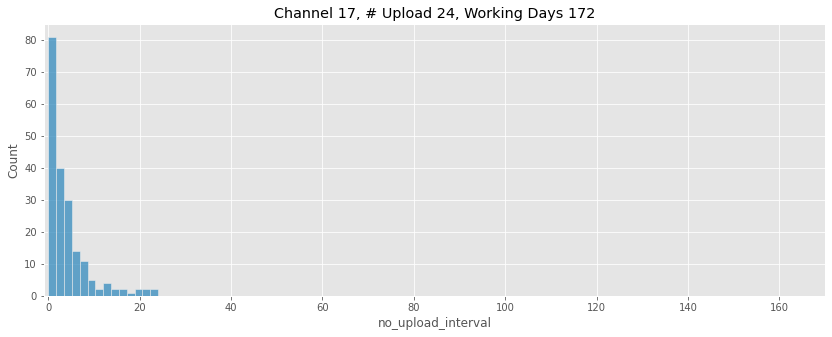

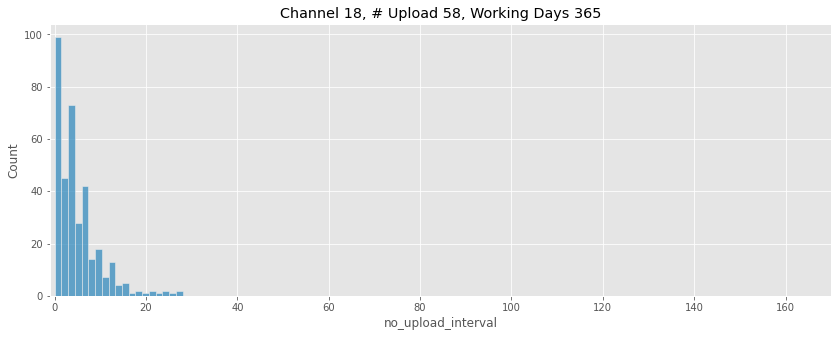

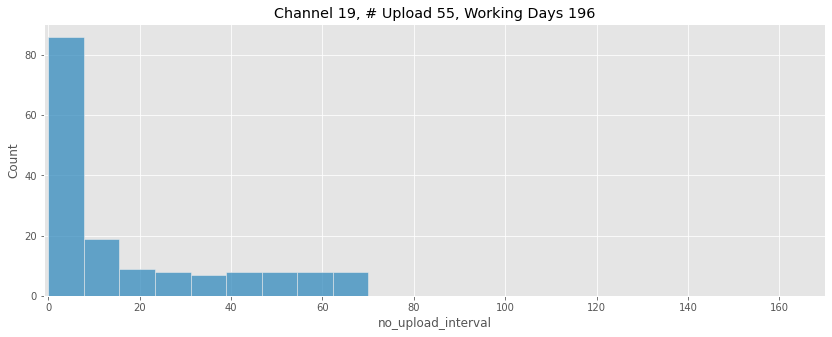

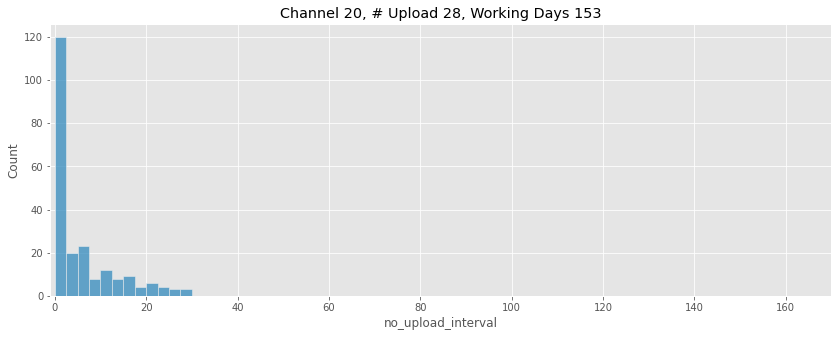

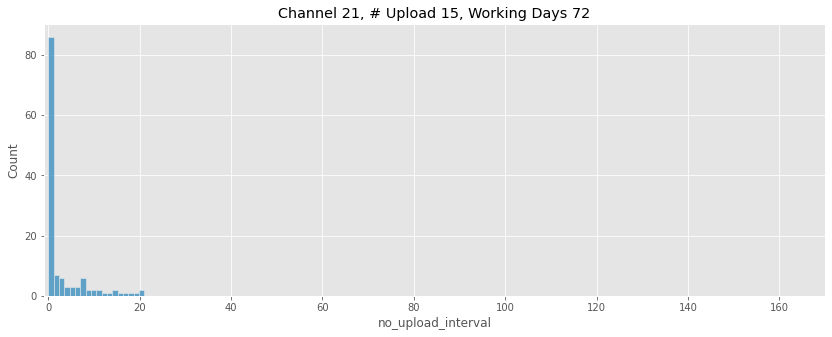

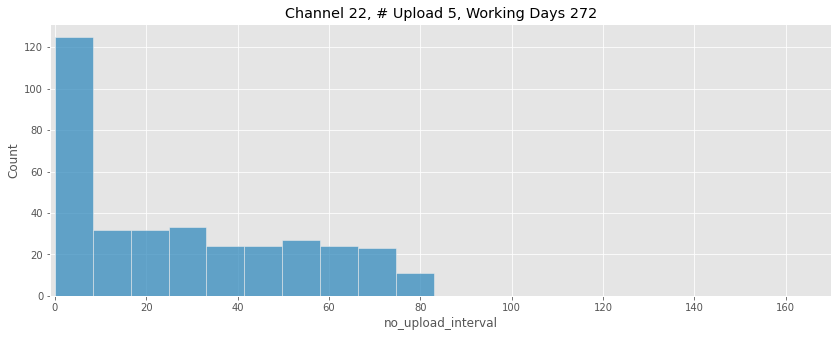

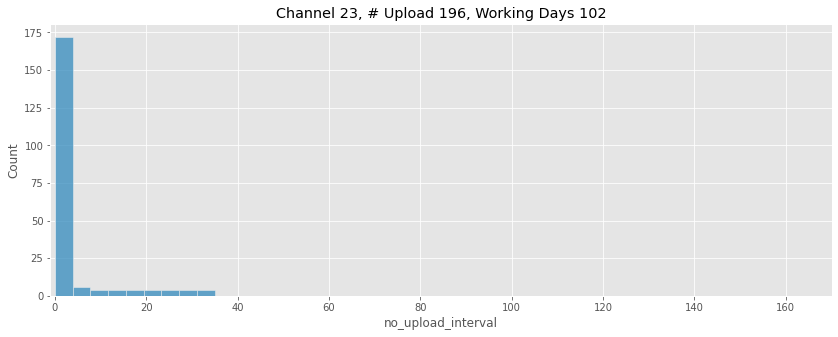

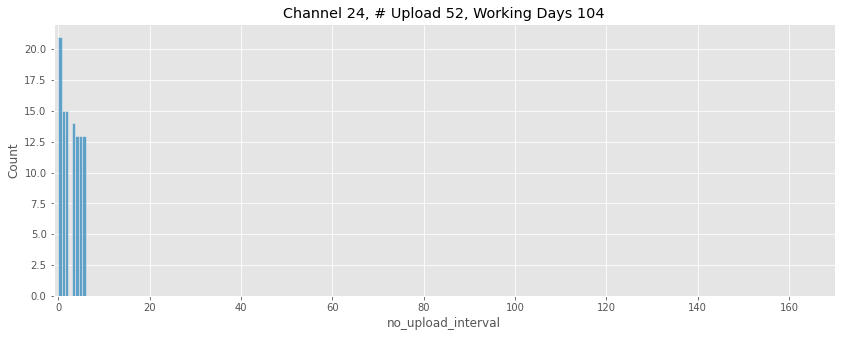

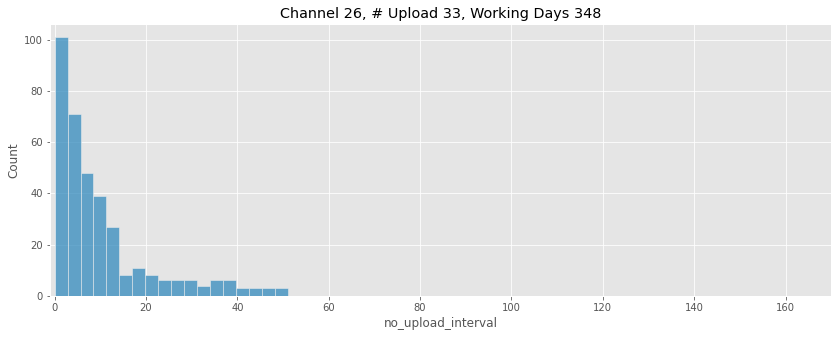

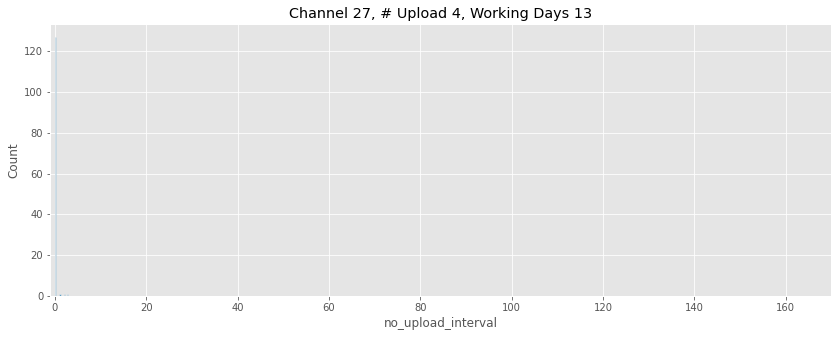

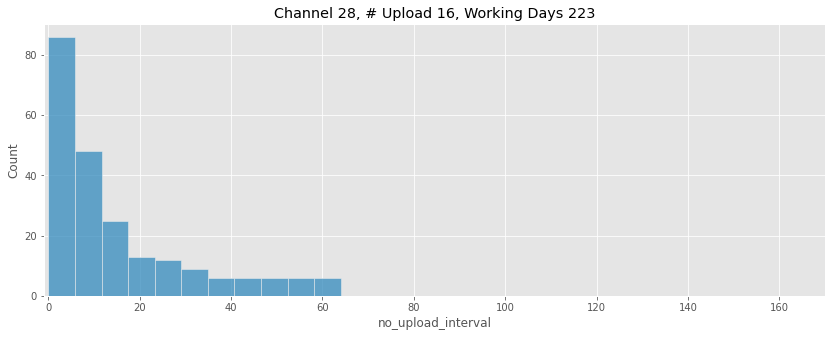

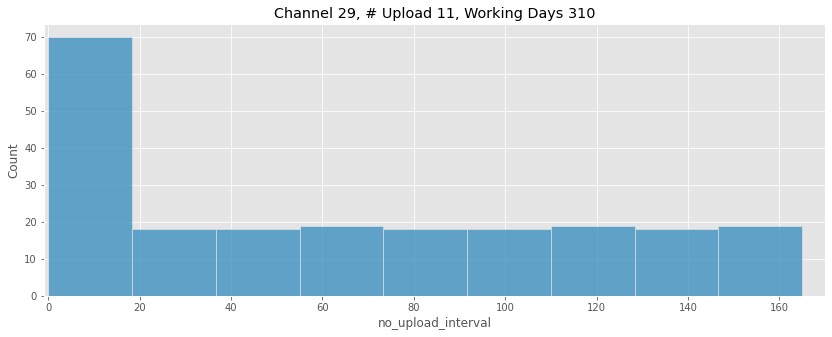

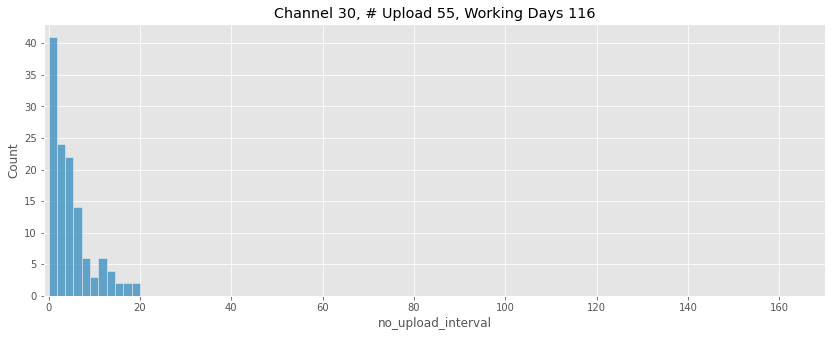

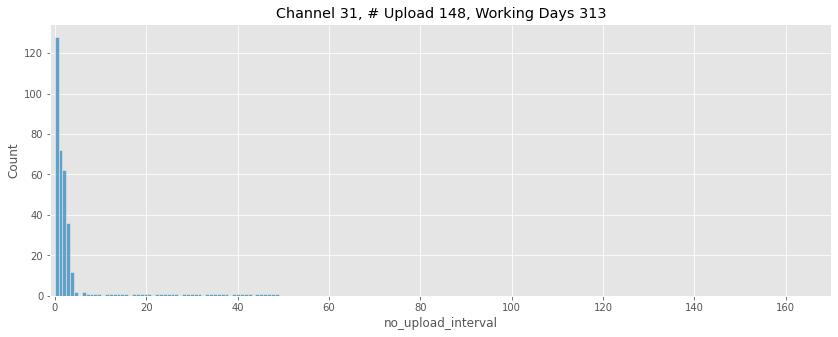

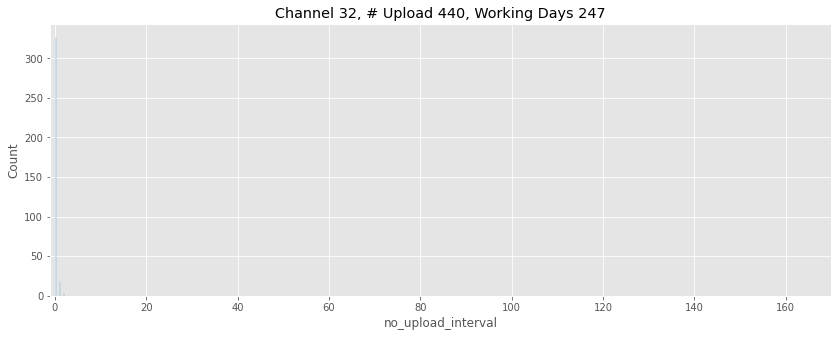

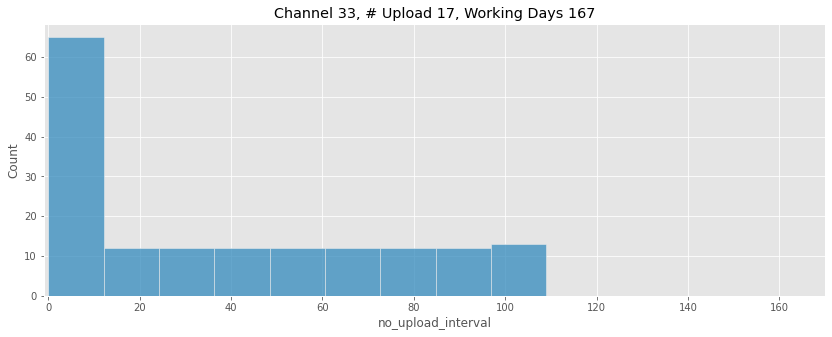

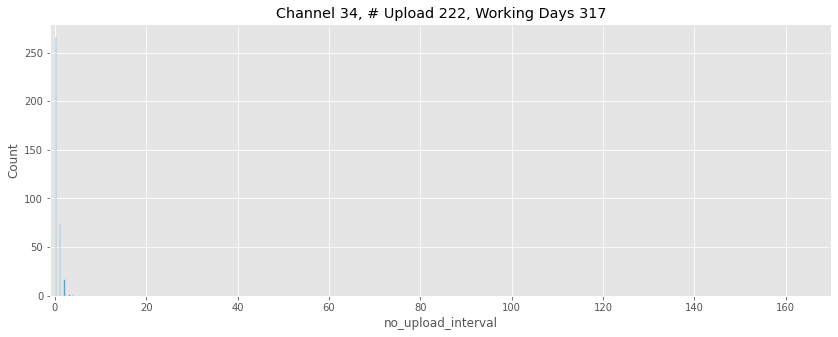

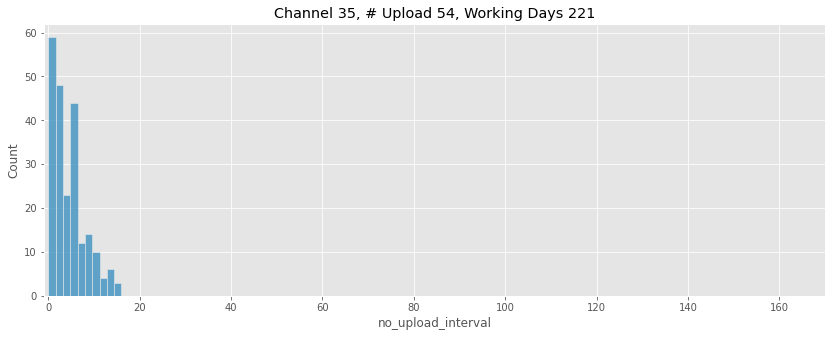

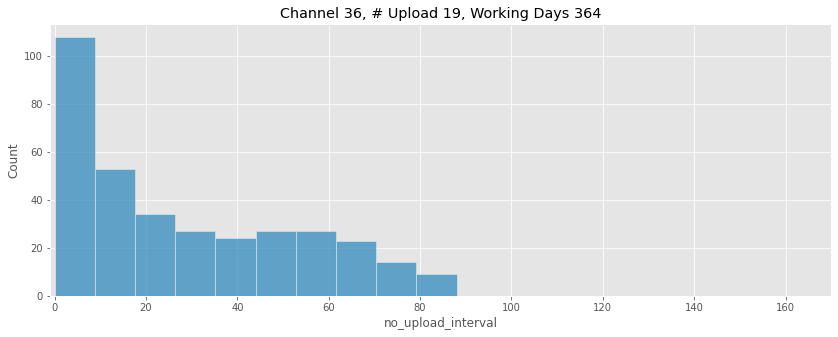

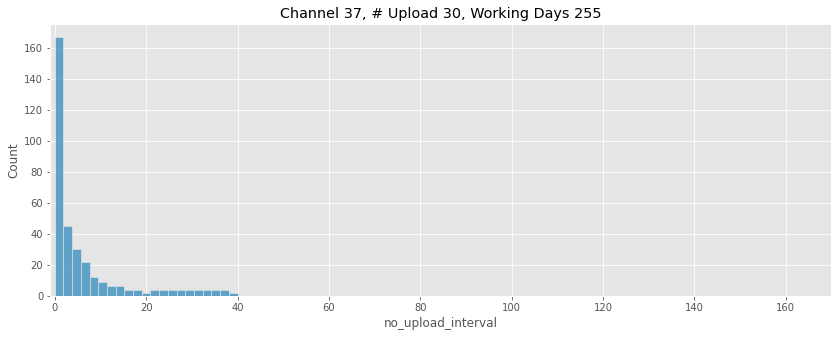

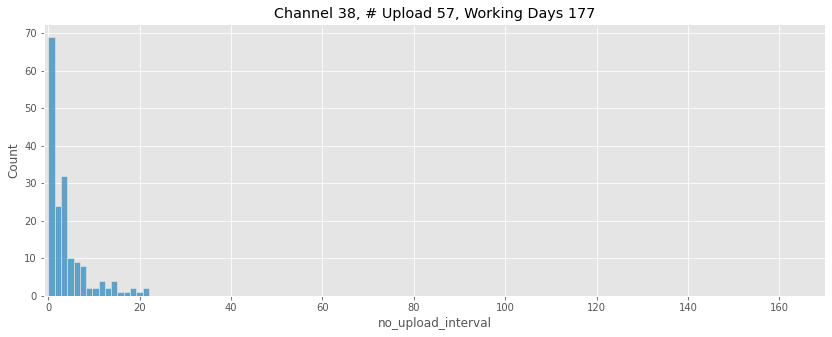

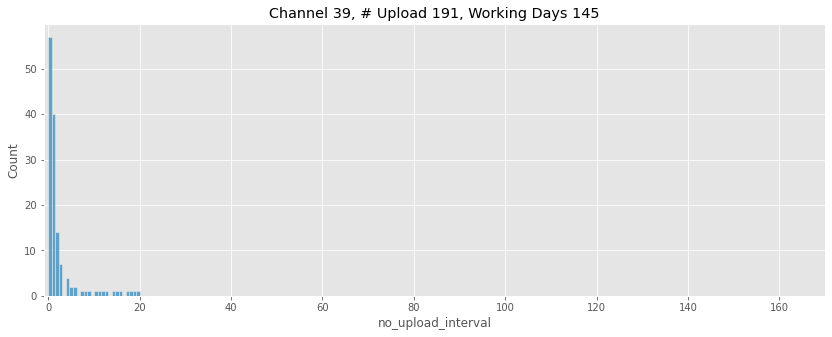

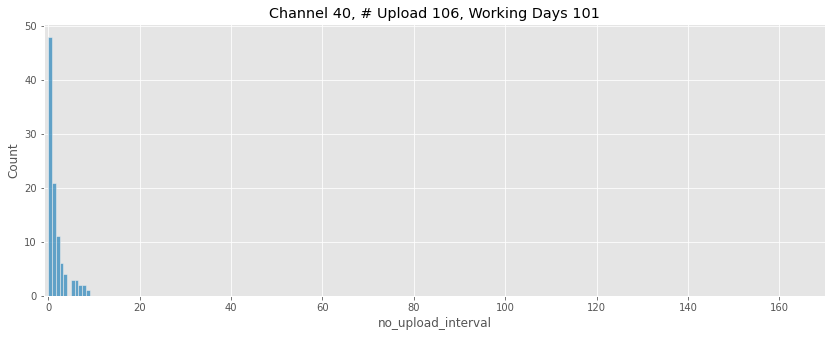

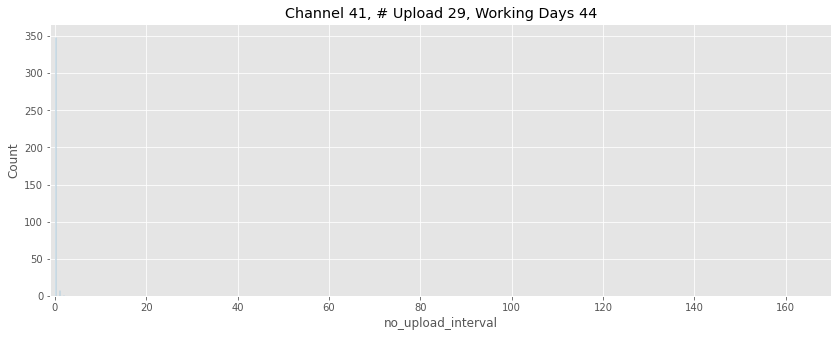

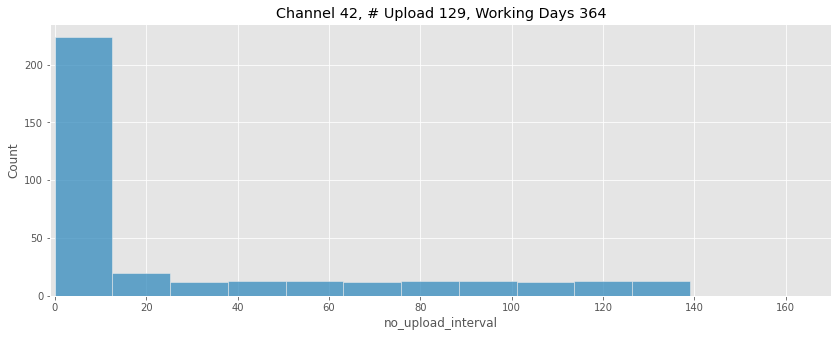

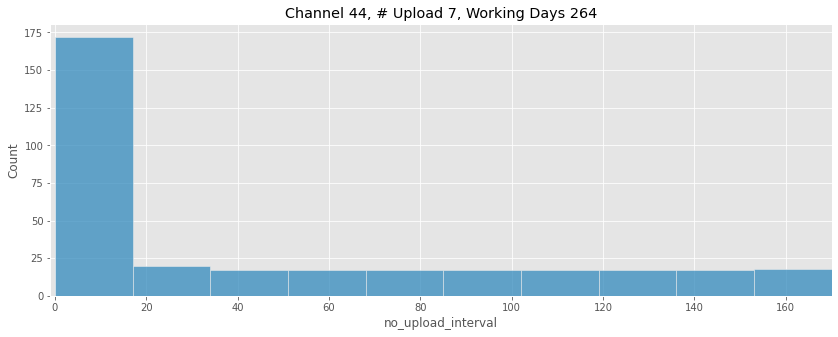

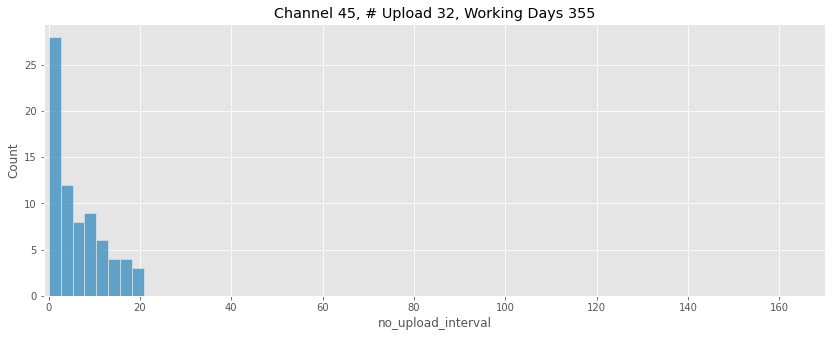

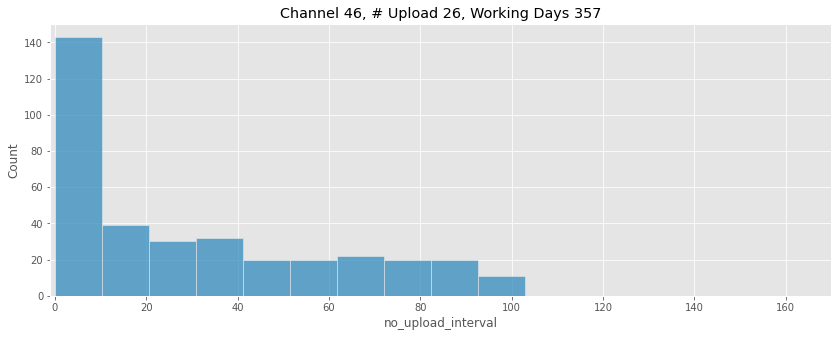

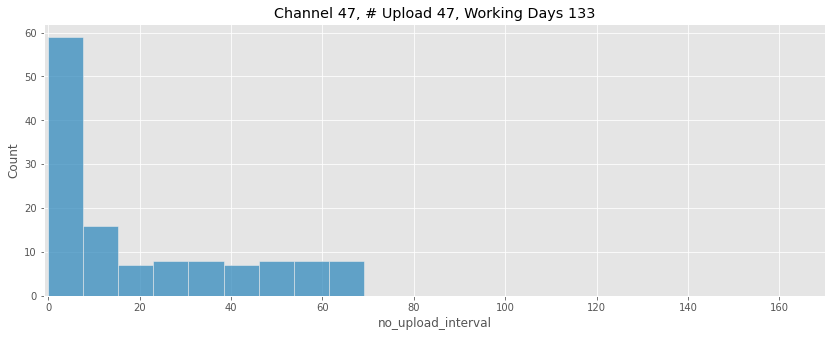

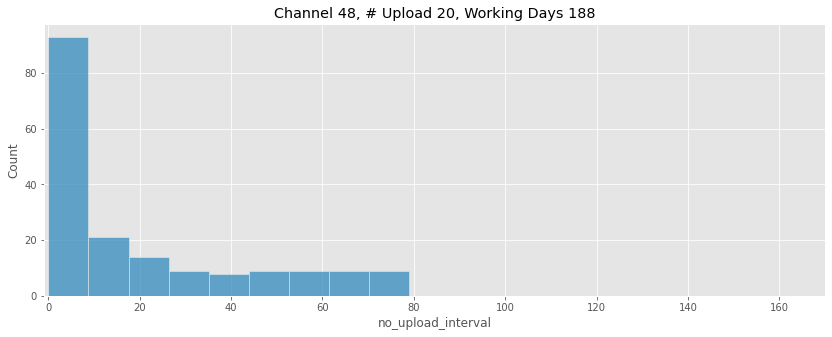

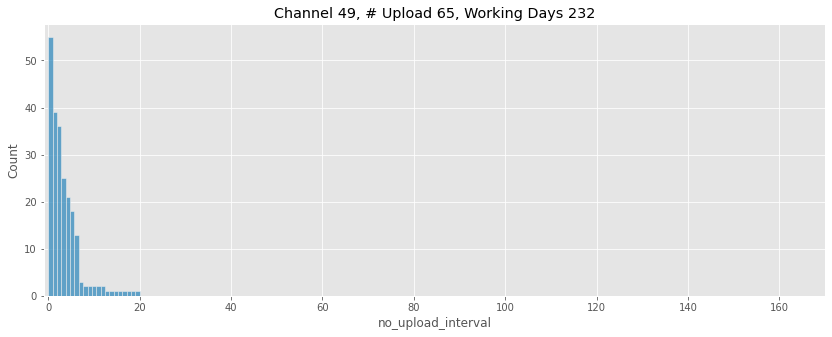

In [204]:
for i in channels:
    plt.figure(figsize=(14, 5))
    temp = raw[raw['channel']==i].reset_index()
    sns.histplot(temp['no_upload_interval'])
    n_video = temp['current_n_video'].iloc[0]
    n_days = working_days[i]
    plt.title(f'Channel {i}, # Upload {n_video}, Working Days {n_days}')
    plt.xlim(-1, raw['no_upload_interval'].max())
    plt.show()

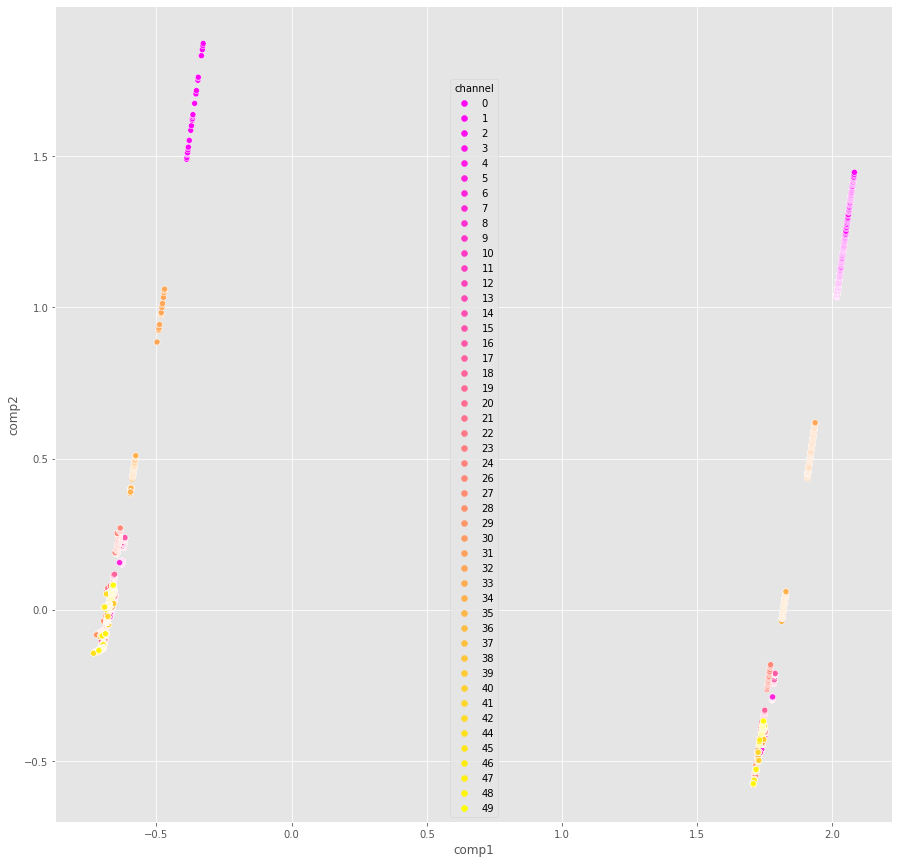

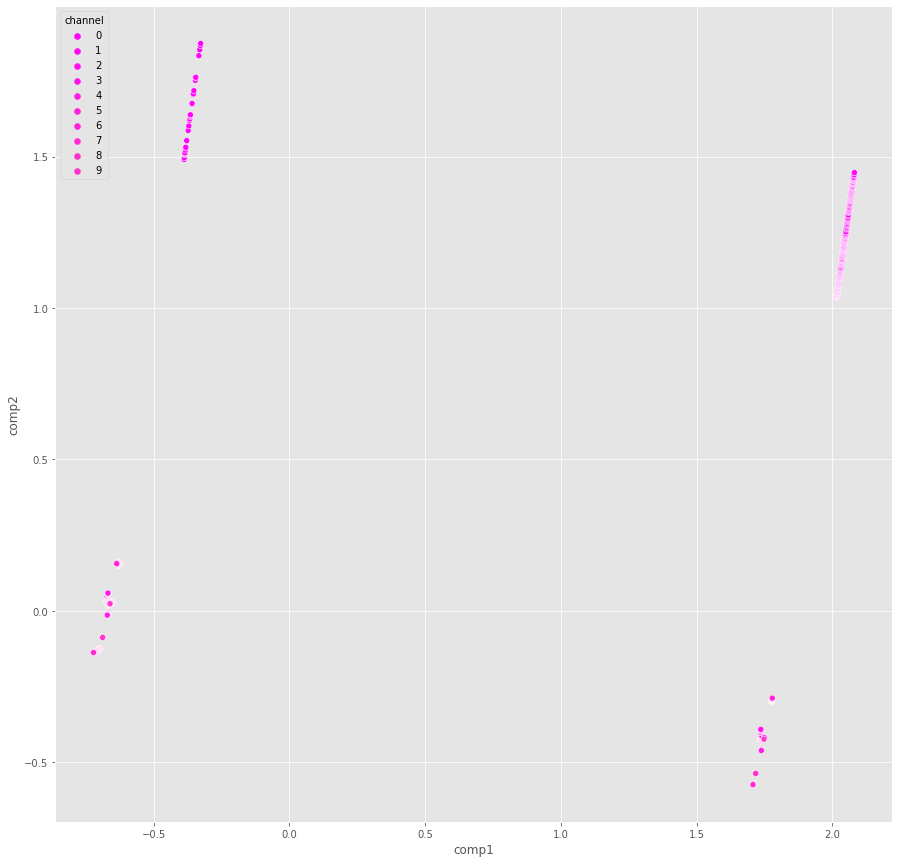

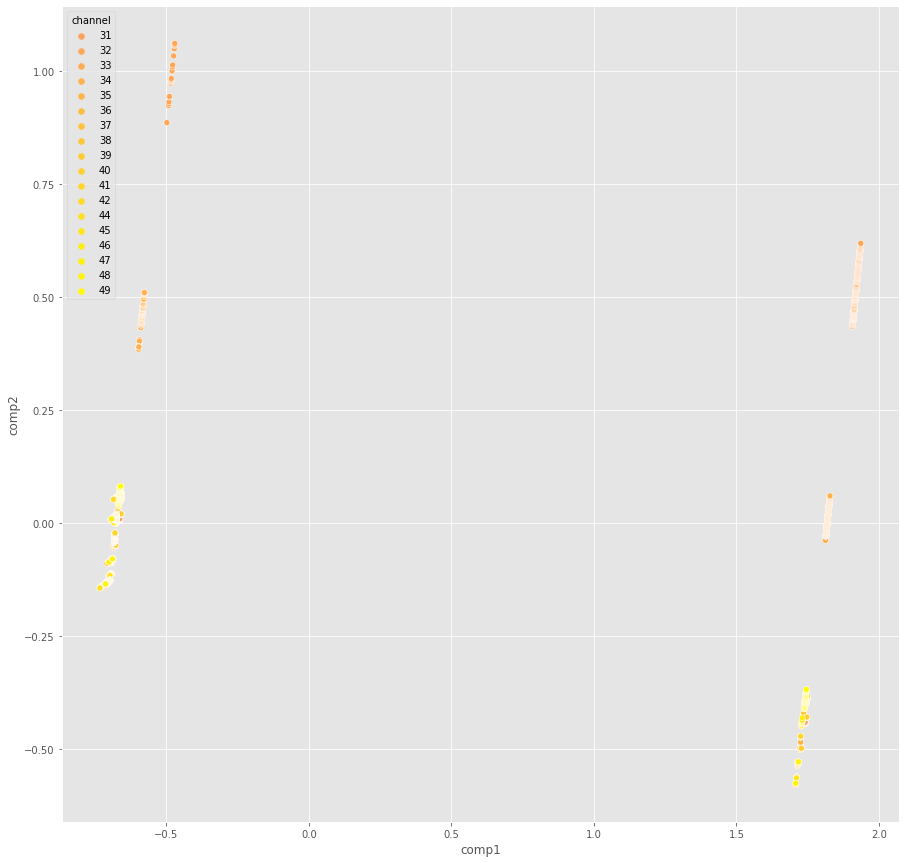

In [295]:
cols = list(sns.color_palette("spring", n_colors=48))

plt.figure(figsize=(15, 15))

sns.scatterplot(x='comp1', y='comp2', data=result, hue='channel', hue_order=channels, palette=cols)
plt.show()

plt.figure(figsize=(15, 15))
temp = result[result['channel'].isin(channels[:10])].reset_index(drop=True)
sns.scatterplot(x='comp1', y='comp2', data=temp, hue='channel', hue_order=channels[:10], palette=cols[:10])
plt.show()

plt.figure(figsize=(15, 15))
temp = result[result['channel'].isin(channels[30:])].reset_index(drop=True)
sns.scatterplot(x='comp1', y='comp2', data=temp, hue='channel', hue_order=channels[30:], palette=cols[30:])
plt.show()

In [216]:
pd.DataFrame(daily_upload).describe()

,0
count,48.000000
mean,0.528934
std,0.534765
min,0.018382
25%,0.134056
50%,0.332274
75%,0.738562
max,2.180619


In [226]:
brilliant = daily_upload[daily_upload < 0.1].index.tolist()

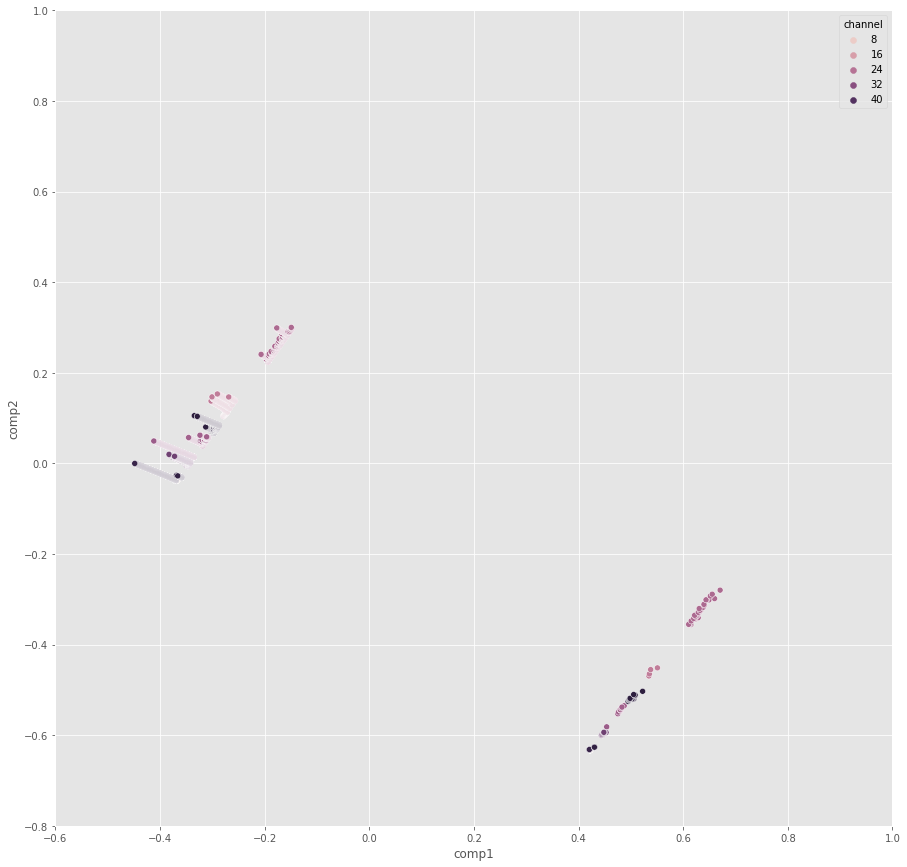

In [227]:
plt.figure(figsize=(15, 15))
temp = result[result['channel'].isin(brilliant)].reset_index(drop=True)
sns.scatterplot(x='comp1', y='comp2', data=temp, hue='channel', hue_order=brilliant)
plt.xlim(-0.6, 1,8)
plt.ylim(-0.8, 1,8)
plt.show()

In [233]:
raw['channel'].value_counts().head(10)

0     558
16    511
6     446
1     369
34    363
14    362
18    360
26    359
41    358
42    358
Name: channel, dtype: int64

In [246]:
wonder = result[result['comp1'] > 0.6]['channel'].index.tolist()

In [240]:
raw = pd.read_csv('../../data/train_raw_LITE.csv')
raw.loc[wonder, :]

,channel,sign_in,date,title,genre,duration,video_n_view,description,n_comment,n_like,n_dislike,daily_n_view,cumul_view,cumul_subs,current_cumul_view,current_n_video,current_cumul_subs
0,Tatiana DeVoe,2019-9-18,2019-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7659,254659,21900,1621877,19,54800
1,Tatiana DeVoe,2019-9-18,2019-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7659,262318,22200,1621877,19,54800
2,Tatiana DeVoe,2019-9-18,2019-12-05,Q&A: Je suis espagnole ? J’ai gagné 20k abonné...,People & Blogs,23.27,41808.0,Salut tout le monde ! \n\nDans cette video je ...,446.0,4112.0,21.0,9609,271927,22599,1621877,19,54800
3,Tatiana DeVoe,2019-9-18,2019-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14500,286427,23200,1621877,19,54800
4,Tatiana DeVoe,2019-9-18,2019-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11200,297627,23900,1621877,19,54800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11993,Bv-_- Saad,2019-6-22,2020-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4423,109,4717,157,111
11996,Bv-_- Saad,2019-6-22,2020-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,4439,109,4717,157,111
11999,Bv-_- Saad,2019-6-22,2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,4455,109,4717,157,111
12020,Bv-_- Saad,2019-6-22,2020-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4548,114,4717,157,111


<AxesSubplot:>

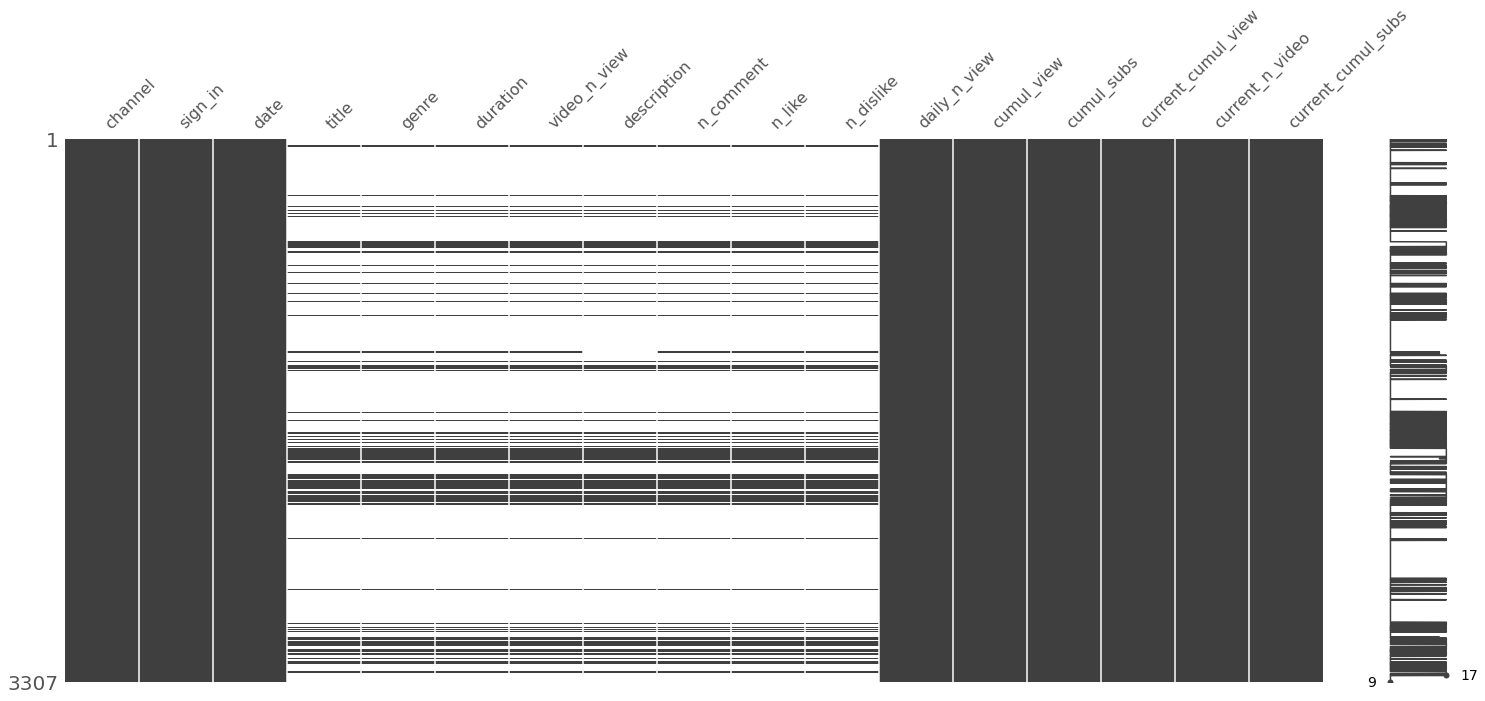

In [241]:
msno.matrix(raw.loc[wonder, :])

<AxesSubplot:>

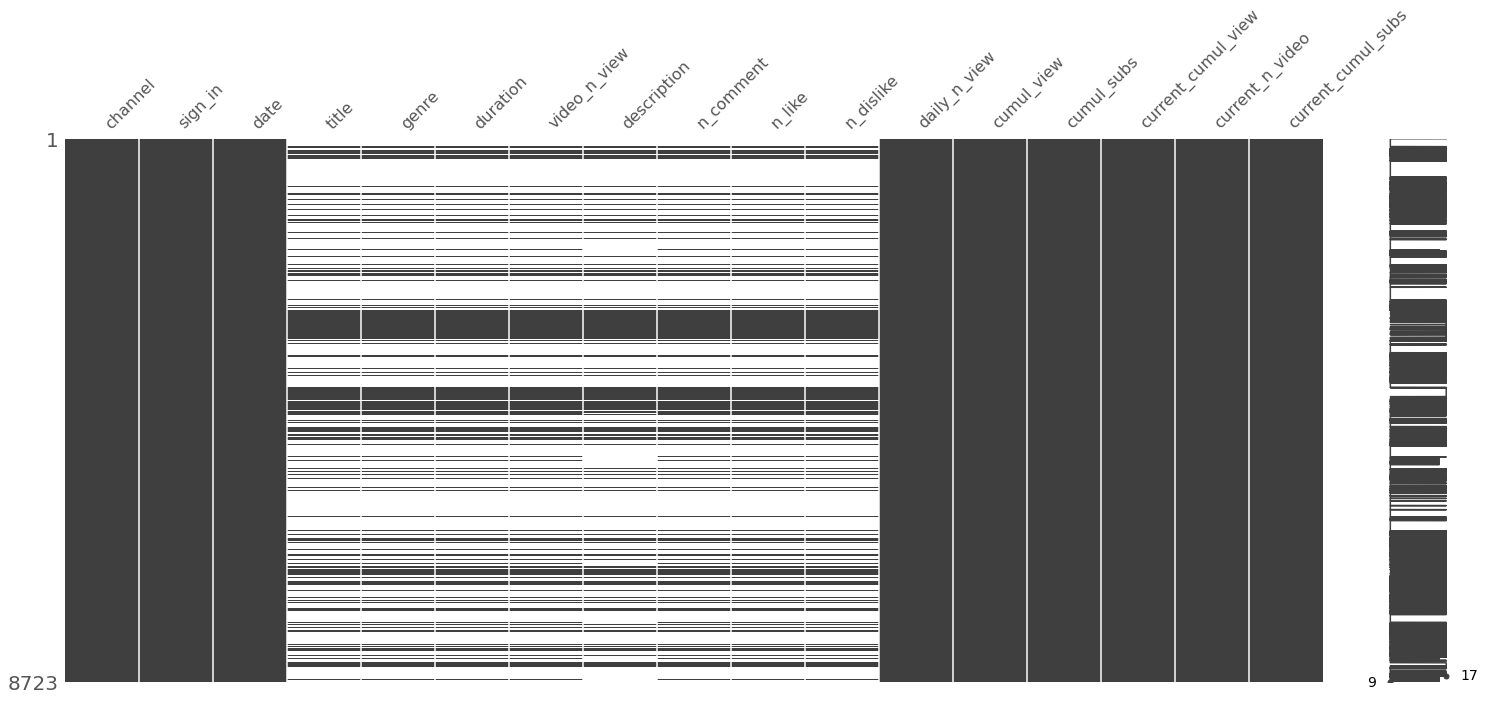

In [243]:
msno.matrix(raw.loc[wonder, :])

<AxesSubplot:>

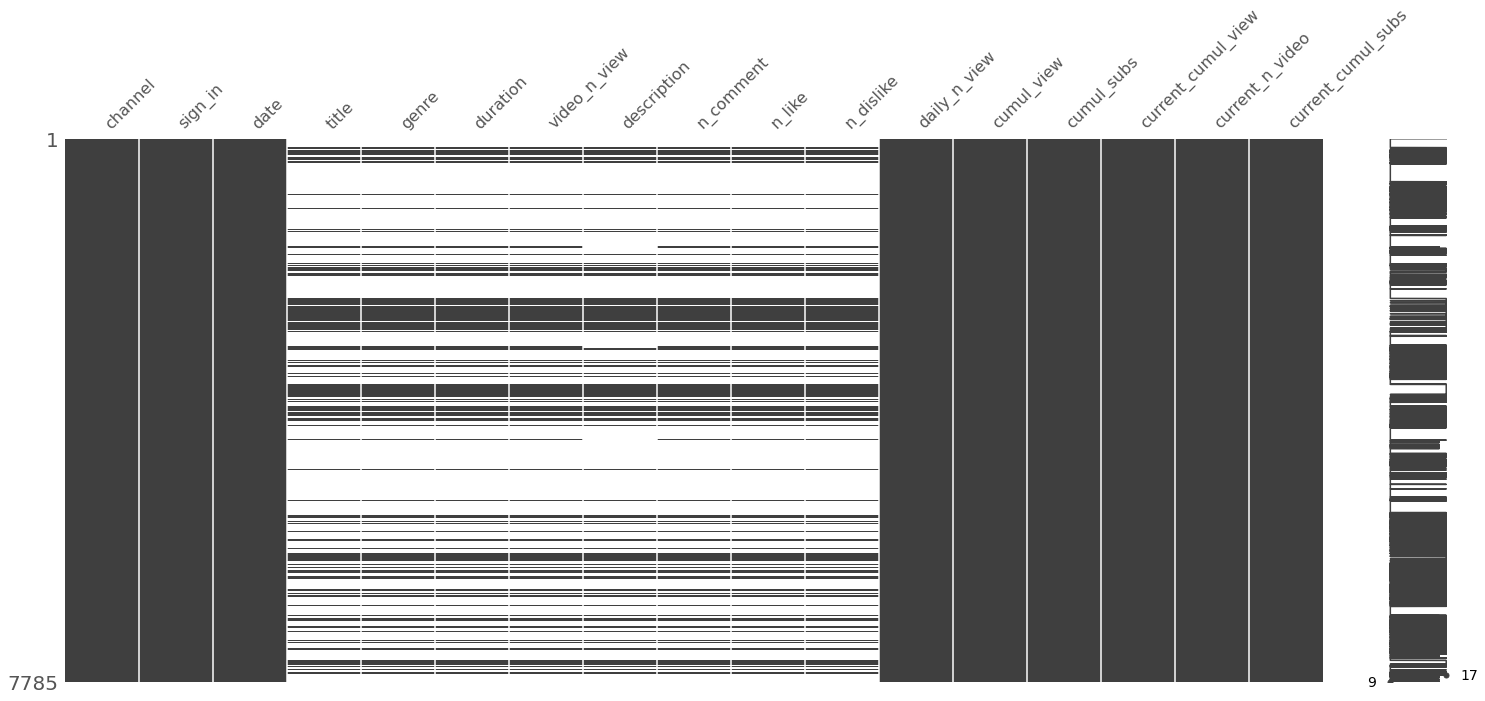

In [245]:
msno.matrix(raw.loc[wonder, :])

<AxesSubplot:>

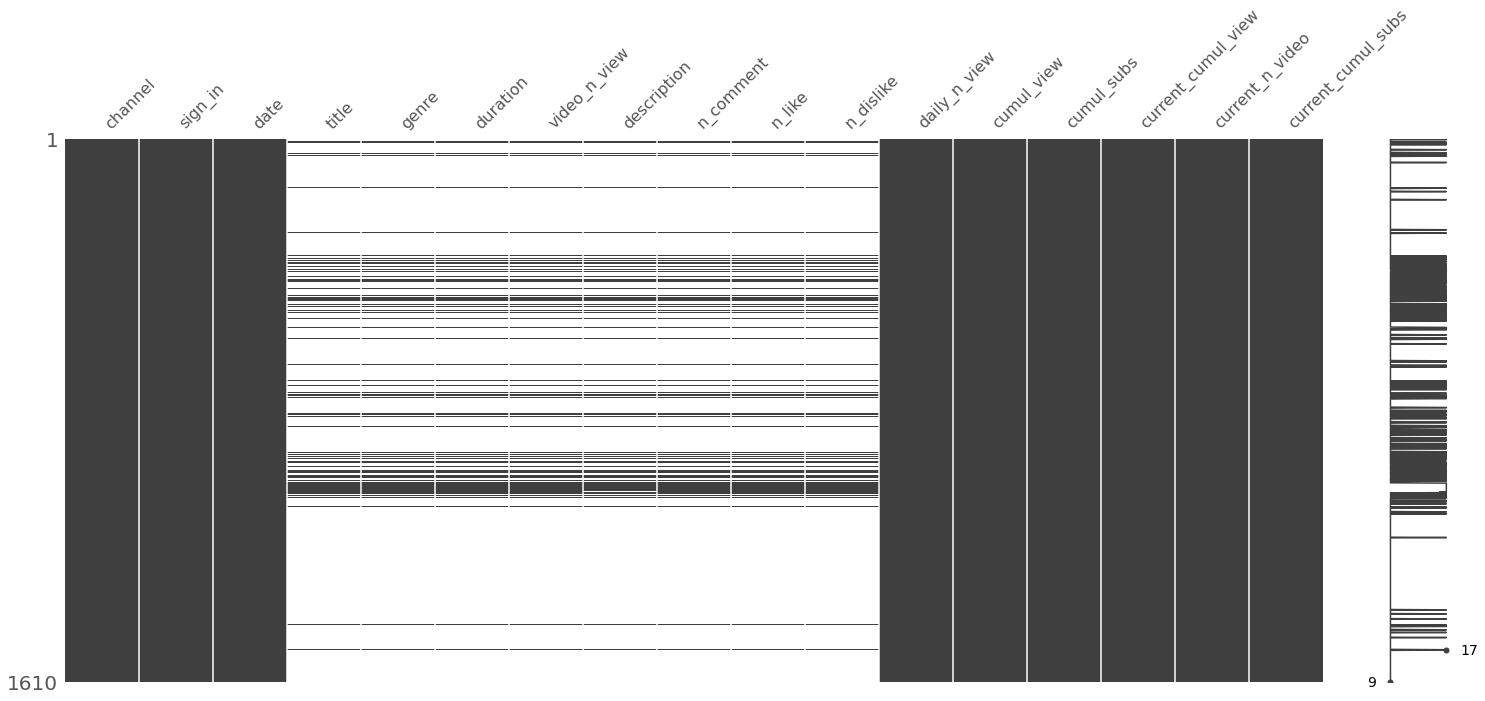

In [247]:
msno.matrix(raw.loc[wonder, :])

In [19]:
def add_no_upload_interval(self):
        self.result = self.result.groupby('channel').apply(lambda x: self._get_no_upload_interval(x)).reset_index(drop=True)

def _get_is_upload(data):
        result = data.reset_index(drop=True)
        upload_idx = result[result['title'].notnull()].index.tolist()
        result['is_upload'] = 0
        result.loc[upload_idx, 'is_upload'] = 1
        return result

def _get_no_upload_interval(data):
    result = data.reset_index(drop=True)
    upload_idx = result[result['is_upload'] == 1].index.tolist()

    temp = [0 for i in range(result.shape[0])]
    for i in range(len(upload_idx)):
        if i == len(upload_idx)-1:
            former = upload_idx[i]
            temp[former+1:] = [i+1 for i in range(len(temp[former+1:]))]
        else:
            former, latter = upload_idx[i], upload_idx[i+1]
            temp[former+1:latter] = [i+1 for i in range(len(temp[former+1:latter]))]
    result['no_upload_interval'] = temp
    return result

,channel,sign_in,date,title,genre,duration,video_n_view,description,n_comment,n_like,n_dislike,daily_n_view,cumul_view,cumul_subs,current_cumul_view,current_n_video,current_cumul_subs,is_upload
0,36,2019-9-18,2019-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7659,254659,21900,1621877,19,54800,0
1,36,2019-9-18,2019-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7659,262318,22200,1621877,19,54800,0
2,36,2019-9-18,2019-12-05,Q&A: Je suis espagnole ? J’ai gagné 20k abonné...,8,23.27,41808.0,Salut tout le monde ! \n\nDans cette video je ...,446.0,4112.0,21.0,9609,271927,22599,1621877,19,54800,1
3,36,2019-9-18,2019-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14500,286427,23200,1621877,19,54800,0
4,36,2019-9-18,2019-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11200,297627,23900,1621877,19,54800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12440,28,2019-9-12,2020-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5959,2005171,145000,2025975,16,146000,0
12441,28,2019-9-12,2020-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,2007192,145000,2025975,16,146000,0
12442,28,2019-9-12,2020-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6120,2013312,145000,2025975,16,146000,0
12443,28,2019-9-12,2020-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,2015219,145500,2025975,16,146000,0


In [18]:
raw.groupby

,channel,sign_in,date,genre,duration,video_n_view,n_comment,n_like,n_dislike,daily_n_view,cumul_view,cumul_subs,current_cumul_view,current_n_video,current_cumul_subs
0,36,2019-9-18,2019-12-03,NaN,NaN,NaN,NaN,NaN,NaN,7659,254659,21900,1621877,19,54800
1,36,2019-9-18,2019-12-04,NaN,NaN,NaN,NaN,NaN,NaN,7659,262318,22200,1621877,19,54800
2,36,2019-9-18,2019-12-05,8,23.27,41808.0,446.0,4112.0,21.0,9609,271927,22599,1621877,19,54800
3,36,2019-9-18,2019-12-06,NaN,NaN,NaN,NaN,NaN,NaN,14500,286427,23200,1621877,19,54800
4,36,2019-9-18,2019-12-07,NaN,NaN,NaN,NaN,NaN,NaN,11200,297627,23900,1621877,19,54800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12440,28,2019-9-12,2020-11-23,NaN,NaN,NaN,NaN,NaN,NaN,5959,2005171,145000,2025975,16,146000
12441,28,2019-9-12,2020-11-24,NaN,NaN,NaN,NaN,NaN,NaN,2021,2007192,145000,2025975,16,146000
12442,28,2019-9-12,2020-11-25,NaN,NaN,NaN,NaN,NaN,NaN,6120,2013312,145000,2025975,16,146000
12443,28,2019-9-12,2020-11-26,NaN,NaN,NaN,NaN,NaN,NaN,1907,2015219,145500,2025975,16,146000
